In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Extração csv

In [14]:
from mlex import PastFutureSplit
path = "/data/pcpe_01.csv"
obj = PastFutureSplit()
df = obj.csv_extraction(path=path)
df

,NUMERO_CASO,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CPF_CNPJ_TITULAR,CNAB,CNAB=101,CNAB=119,CNAB=120,...,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-a,I-b,I-c,I-d,I-e,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
0,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
1,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
2,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
3,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
4,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138300,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,206,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138301,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,102,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021
138302,CASO-01-L1K4U4,O9A,490,296083,2,KO2307484082,102,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138303,CASO-01-L1K4U4,O6Y,5776,191834,1,KO2307484082,205,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021


# columns

In [15]:
columns_num = [
    'DIA_LANCAMENTO', 
    'MES_LANCAMENTO',
    'VALOR_TRANSACAO',
    'VALOR_SALDO',
]

columns_cat = [
    'TIPO',
    'CNAB',
    'NATUREZA_SALDO'
]

target = ['I-d']
y = df[target].values
y = np.nan_to_num(y)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [16]:
from mlex import CompositeTranformer
tranformer = CompositeTranformer(
    numeric_features=columns_num,
    categorical_features=columns_cat
)
Xt = tranformer.transform(df)

# Data_Split

In [17]:
from mlex.utils.splits import PastFutureSplit

split = PastFutureSplit()

X_train, X_test, y_train, y_test = split.train_test_split(Xt,y)

In [18]:
from mlex import SequenceTransfomer
p = SequenceTransfomer()
X_train = np.array(X_train)
y_train = np.array(y_train)
data_train = p.transform(
    X = X_train,
    y = y_train
)

X_test = np.array(X_test)
y_test = np.array(y_test)
data_test = p.transform(
    X = X_train,
    y = y_train
)



2024-05-10 15:04:27.475913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-10 15:04:27.475960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: a1c211f74e0b
2024-05-10 15:04:27.475971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: a1c211f74e0b
2024-05-10 15:04:27.476112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-05-10 15:04:27.476147: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.30.2


In [19]:
import keras
import keras.optimizers.adam

# Model

In [20]:
from mlex.pipelines.simple_pipeline import SimplePipeline
from mlex.models.models import SimpleRNNModel

my_model = SimpleRNNModel(input_shape=Xt.shape)

my_model.get_model()


In [21]:
my_model.compile()

In [22]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 138305, 16)        992       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


# Fitting

In [23]:
history = my_model.fit(data_train)

Epoch 1/10


2024-05-10 15:04:34.036790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [69152,45]
	 [[{{node Placeholder/_0}}]]
2024-05-10 15:04:34.037167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_28}}]]


541/541 [==============================] - 3s 4ms/step - loss: 0.2981 - acc: 0.8886 - auc: 0.7761
Epoch 2/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2467 - acc: 0.9038 - auc: 0.8655
Epoch 3/10
541/541 [==============================] - 2s 4ms/step - loss: 0.2320 - acc: 0.9069 - auc: 0.8858
Epoch 4/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2231 - acc: 0.9104 - auc: 0.8963
Epoch 5/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2164 - acc: 0.9129 - auc: 0.9037
Epoch 6/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2112 - acc: 0.9154 - auc: 0.9089
Epoch 7/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2070 - acc: 0.9173 - auc: 0.9131
Epoch 8/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2035 - acc: 0.9188 - auc: 0.9165
Epoch 9/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2008 - acc: 0.9200 - auc: 0.9192
Epoch 10/10
541/541 [=========

# Predicting

In [24]:
y_pred = my_model.predict(data_test)

2024-05-10 15:04:54.971499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_8}}]]
2024-05-10 15:04:54.972177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [69152,1]
	 [[{{node Placeholder/_20}}]]


541/541 [==============================] - 3s 4ms/step


In [25]:
np.quantile(y_pred, 0.95)

0.7190777540206903

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:69143], y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Metrics

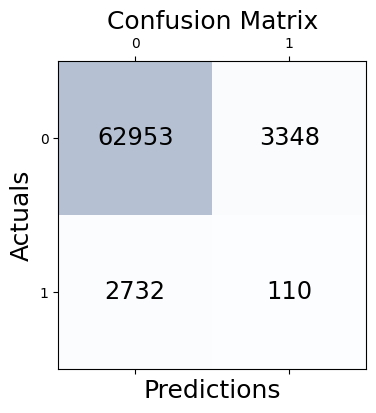

In [29]:
from sklearn.metrics import confusion_matrix
sequence_length = 5


conf_matrix = confusion_matrix(y_true=y_test[sequence_length:-sequence_length+1], y_pred=y_pred > np.quantile(y_pred, 0.95))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matxrix', fontsize=18)
plt.savefig('../results/confusion_matrix.pdf')
plt.show()

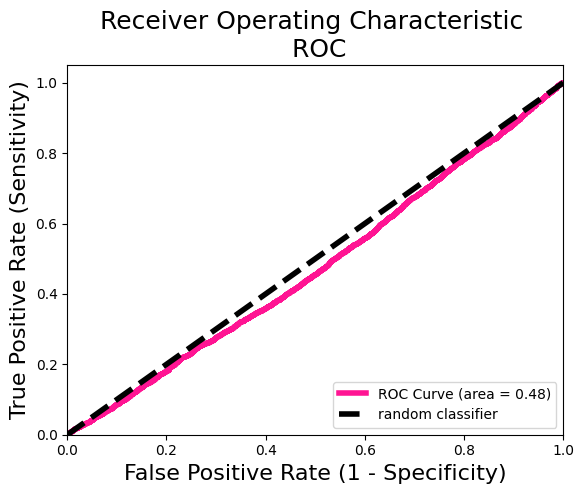

In [18]:
from sklearn import metrics
title = "ROC"
fpr, tpr, thresholds = metrics.roc_curve(y_test[sequence_length:-sequence_length+1], y_pred)
auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='deeppink', linewidth=4, label=f"ROC Curve (area = {round(auc,2) })")
ax.plot([0,1], [0,1], "k--",linewidth=4, label='random classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (1 - Specificity)", fontsize=16)
ax.set_ylabel("True Positive Rate (Sensitivity)", fontsize=16)
ax.set_title(f"Receiver Operating Characteristic \n {title}", fontsize=18)
ax.legend(loc="lower right")
plt.savefig("../results/roc.pdf")
plt.show()